# UCI dataset

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [29]:
df = pd.read_csv('forestfires.csv')
df.info

temp = df['month'].unique()
print(temp)

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']


## Encoding Data

In [50]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['month']= label_encoder.fit_transform(df['month'])
df['day']= label_encoder.fit_transform(df['day'])
df.info

<bound method DataFrame.info of      X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5      7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4     10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4     10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6      7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6      7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

517
7


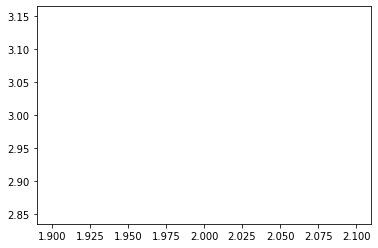

In [76]:
plt.plot(2,3)
print(len(df))
print(df['month'][0])

In [77]:
sum = 0
month.
for i in range(len(df)):
    print(df['month'][i])
# print(sum)

7
10
10
7
7
1
1
1
11
11
11
11
1
11
11
11
7
10
7
0
11
11
6
1
1
1
11
11
11
11
11
11
11
11
11
11
10
10
10
7
5
1
1
11
11
11
11
5
7
7
11
1
1
1
1
11
11
10
3
3
7
7
1
1
1
1
11
11
11
7
7
11
7
1
11
3
3
7
1
1
1
1
1
1
1
11
11
11
11
7
1
7
1
1
1
11
3
7
1
1
1
1
1
11
4
7
7
1
11
11
7
7
11
11
7
7
7
7
7
1
1
1
11
11
11
10
7
11
10
10
3
7
7
11
7
1
11
11
5
11
11
1
1
5
1
1
7
11
1
11
6
5
5
11
11
1
11
1
1
11
7
1
7
11
11
7
1
1
7
1
11
1
1
11
1
1
0
1
11
1
11
10
3
10
1
11
7
11
7
7
7
1
1
11
1
1
0
11
11
11
11
7
3
10
7
11
1
11
11
11
10
1
11
7
7
7
11
11
11
7
1
11
7
5
11
11
10
1
11
1
11
11
11
11
11
1
11
11
11
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
8
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
5
1
1
11
11
1
1
7
4
5
1
1
1
1
1
11
7
1
1
3
11
11
7
3
3
11
1
1
6
6
11
1
1
11
1
11
3
11
5


([<matplotlib.axis.XTick at 0x1a9098780d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

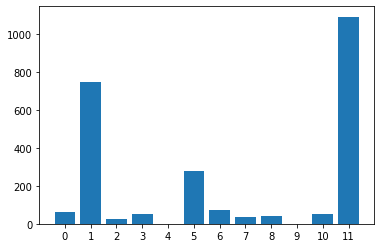

In [27]:
x = df['month'].to_numpy()
y = df['area'].to_numpy()

x, y = zip(*sorted(zip(x, y)))
plt.bar(x,y,)
plt.xticks([i for i in range(12)])

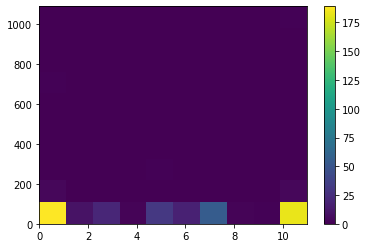

In [69]:
plt.hist2d(x,y)
plt.colorbar()

<BarContainer object of 12 artists>

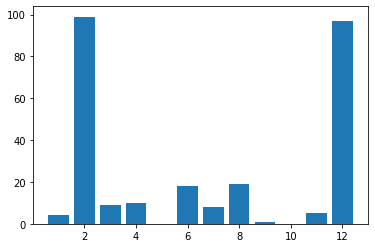

In [86]:
dft = df[df['area'] != 0]
y = np.array([])
x = [_ for _ in range(1,13)]
for i in range(1,13):
    temp = dft[dft['month'] == i-1].count()[0]
    y = np.append(y,temp)

plt.bar(x,y)



In [87]:
y.sum()

270.0